In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("../saved/5m_journal_conf_comp_sci_with_rank_features.csv")
# df = pd.read_csv("../saved/5m_journal_conf_comp_sci_last_20.csv")
# df = pd.read_csv("../saved/250k_journal_conf_last20.csv")

In [2]:
df.columns.tolist()

['PaperId',
 'Abstract',
 'Author_1',
 'Author_10',
 'Author_11',
 'Author_2',
 'Author_3',
 'Author_4',
 'Author_5',
 'Author_6',
 'Author_7',
 'Author_8',
 'Author_9',
 'CitationCount',
 'CitationCountPerYear',
 'FieldOfStudy_0',
 'FieldOfStudy_1',
 'FieldOfStudy_2',
 'FieldOfStudy_3',
 'FieldOfStudy_4',
 'FieldOfStudy_5',
 'FirstPage',
 'JournalName',
 'LastPage',
 'PaperId.1',
 'PublishedDate',
 'Publisher',
 'Rank',
 'Title',
 'YearsSincePublication',
 'AuthorProminence',
 'MagBin',
 'CitationBin',
 'AuthorRank',
 'JournalNameRank',
 'PublisherRank']

In [3]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
cc = df_cs["CitationCountPerYear"].values
cc.shape

(282456,)

In [4]:
print(f"Max number of citations: {np.max(cc)}")
print(f"Median number of citations: {np.median(cc)}")
print(f"Mean number of citations: {np.mean(cc)}")
print(f"Std number of citations: {np.std(cc)}")

print(f"Number of papers with 0 citations: {np.sum((cc == 0))}")
print(f"Number papers with over 50 citations: {np.sum(cc > 50)}")
print(f"Number papers with over 100 citations: {np.sum(cc > 100)}")
print(f"Number papers with over 1k citations: {np.sum(cc > 1000)}")
print(f"Number papers with over 10k citations: {np.sum(cc > 10000)}")


Max number of citations: 3959.474504249291
Median number of citations: 0.2840466926070039
Mean number of citations: 1.7076045926911643
Std number of citations: 14.27315354135886
Number of papers with 0 citations: 64673
Number papers with over 50 citations: 823
Number papers with over 100 citations: 289
Number papers with over 1k citations: 7
Number papers with over 10k citations: 0


/Users/janhenrikbernhard/opt/anaconda3/envs/aml/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

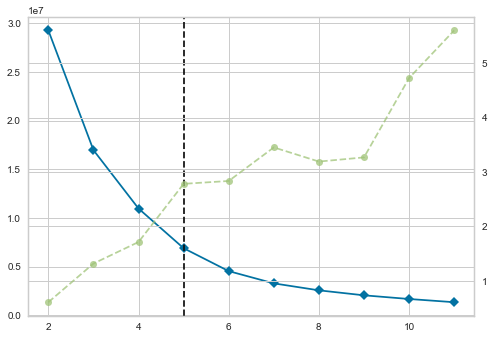

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(cc.reshape(-1, 1))

In [57]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=5, random_state=0)
gmm.fit(cc.reshape(-1,1))
gmm.means_

array([[2.54675146e-01],
       [1.63136712e-33],
       [5.32159706e+01],
       [1.09282243e+00],
       [6.29231249e+00]])

In [58]:
gmm.predict([[3]])
gmm.covariances_

array([[[2.75394812e-02]],

       [[1.00000000e-06]],

       [[1.40213934e+04]],

       [[3.42302064e-01]],

       [[1.87025199e+01]]])

In [8]:
df_cs.drop(labels=[
'PaperId',
'Author_1',
'Author_10',
'Author_11',
'Author_2',
'Author_3',
'Author_4',
'Author_5',
'Author_6',
'Author_7',
'Author_8',
'Author_9',
'FieldOfStudy_0',
'FieldOfStudy_1',
'FieldOfStudy_2',
'FieldOfStudy_3',
'FieldOfStudy_4',
'FieldOfStudy_5',
'FirstPage',
'JournalName',
'LastPage',
'PaperId.1',
'PublishedDate',
'Publisher'
], inplace=True, axis=1)

In [9]:
print(df_cs.shape)
df_cs.head()

(282456, 12)


,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank
0,There are many application areas for wireless ...,3,0.346081,20673,Voice over ZigBee wireless sensor network appl...,8.668493,0,low,below-average,16.0,1.0,627.0
1,Two important automation characteristics are c...,2,0.352827,22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0
2,The Japan Meteorological Agency (JMA) has deve...,2,0.201657,20399,An Advanced System for Monitoring Geomagnetic ...,9.917808,0,low,below-average,1.0,449.0,358.0
3,Abstract A technique is presented for solvin...,1,0.031072,23916,Solving linear equation systems on vector comp...,32.183562,0,high,low,11.0,1.0,609.0
4,Many Internet of Things (IoT) technologies h...,26,5.200000,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation(df, columns=None, plot=True):
    t = df.loc[:, columns] if columns else df
    if not plot:
        print(t.corr())
    else:
        fig = plt.figure()
        mask = np.triu(t.corr())
        sns.heatmap(
            t.corr(),
            mask=mask,
            cbar=False,
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm_r",
            linecolor="black",
        )
        plt.show()

In [65]:
def custom_binning(x, thresholds=None):
    for i, threshold in enumerate(thresholds):
        if x <= threshold:
            return i


In [68]:
threshold = [mu + np.sqrt(var).round() for mu, var in zip(gmm.means_, gmm.covariances_)]
threshold.sort()
print(threshold)
df_cs["BinnedCitations"] = pd.Series([custom_binning(x, thresholds=threshold) for x in cc], index=df_cs.index)
# df_cs["BinnedCitationsPerYear"] = pd.Series(gmm.predict(cc.reshape(-1,1)).reshape(-1,), index=df_cs.index)
df_cs.head()

[array([[1.63136712e-33]]), array([[0.25467515]]), array([[2.09282243]]), array([[10.29231249]]), array([[171.21597057]])]


,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank,BinnedCitationsPerYear,BinnedCitations
0,There are many application areas for wireless ...,3,0.346081,20673,Voice over ZigBee wireless sensor network appl...,8.668493,0,low,below-average,16.0,1.0,627.0,0,2.0
1,Two important automation characteristics are c...,2,0.352827,22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0,0,2.0
2,The Japan Meteorological Agency (JMA) has deve...,2,0.201657,20399,An Advanced System for Monitoring Geomagnetic ...,9.917808,0,low,below-average,1.0,449.0,358.0,0,1.0
3,Abstract A technique is presented for solvin...,1,0.031072,23916,Solving linear equation systems on vector comp...,32.183562,0,high,low,11.0,1.0,609.0,0,1.0
4,Many Internet of Things (IoT) technologies h...,26,5.200000,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0,4,3.0


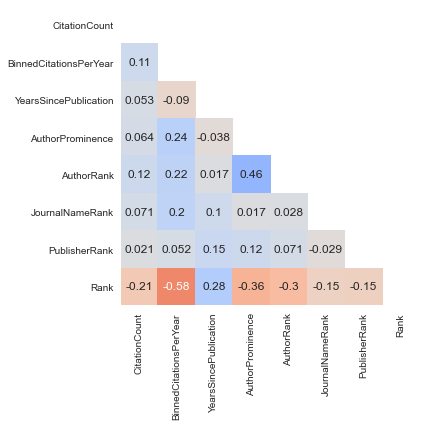

In [69]:
correlation(df_cs, columns=[
    "CitationCount",
    "BinnedCitationsPerYear",
    "YearsSincePublication",
    "AuthorProminence",
    "AuthorRank",
    "JournalNameRank",
    "PublisherRank",
    "Rank"
])

[121695, 64673, 3087, 64010, 28991]


([<matplotlib.axis.XTick at 0x7fbef3739a50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

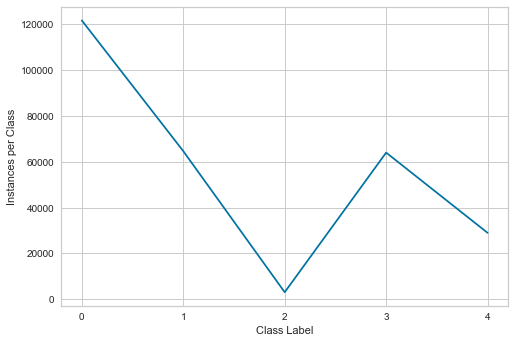

In [70]:
classes = df_cs["BinnedCitationsPerYear"].unique()
classes.sort()
x = [np.sum(df_cs.loc[:, "BinnedCitationsPerYear"].values == c) for c in classes]
print(x)
fig = plt.figure()
plt.plot(classes, x)
plt.ylabel("Instances per Class")
plt.xlabel("Class Label")
plt.xticks(classes)

In [71]:
df_uniform = df_cs.copy()
df_uniform.drop(df_uniform[df_uniform["BinnedCitationsPerYear"]==1].index, inplace=True)
df_uniform.drop(df_uniform[df_uniform["BinnedCitationsPerYear"]==2].index, inplace=True)
print(df_uniform.shape)
print(df_uniform["BinnedCitationsPerYear"].unique())

(214696, 14)
[0 4 3]


In [72]:
df_uniform[df_uniform["BinnedCitationsPerYear"]==3] = 1
df_uniform[df_uniform["BinnedCitationsPerYear"]==4] = 1

[121695, 93001] [0 1]


([<matplotlib.axis.XTick at 0x7fbef25dfb10>,
 [Text(0, 0, ''), Text(0, 0, '')])

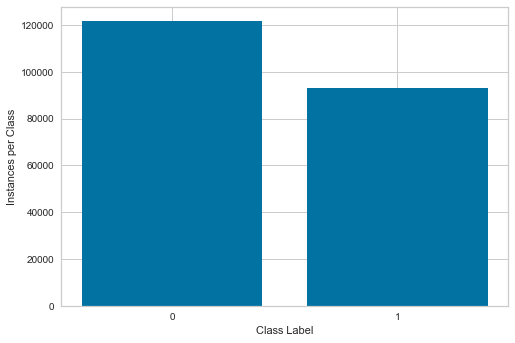

In [73]:
classes = df_uniform["BinnedCitationsPerYear"].unique()
x = [np.sum(df_uniform.loc[:, "BinnedCitationsPerYear"].values == c) for c in classes]
print(x, classes)
fig = plt.figure()
plt.bar(classes, x)
plt.ylabel("Instances per Class")
plt.xlabel("Class Label")
plt.xticks(classes)

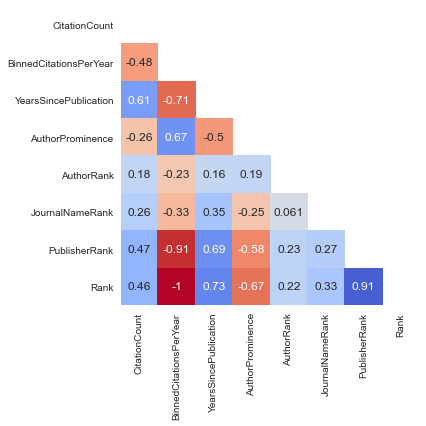

In [74]:
correlation(df_uniform, columns=[
    "CitationCount",
    "BinnedCitationsPerYear",
    "YearsSincePublication",
    "AuthorProminence",
    "AuthorRank",
    "JournalNameRank",
    "PublisherRank",
    "Rank"
])

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
features = [ 
    "AuthorRank",
    "JournalNameRank",
    "PublisherRank"
    ]
X = df_uniform.loc[:, features].values
y = df_uniform.loc[:, "BinnedCitationsPerYear"].values
print(X.shape, y.shape)

X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_dev, y_train, y_dev = train_test_split(X_, y_, test_size=0.15)

X_train_mini, y_train_mini = X_train[:1000], y[:1000]

(214696, 3) (214696,)


In [84]:
def make_uniform(labels, max_cnt):
    selection= np.zeros_like(labels, dtype=bool)
    for c in range(np.min(labels), np.max(labels)+1):
        cnt = 0
        for i, y in enumerate(labels):
            if cnt == split: break
            bool_val = y == c
            if bool_val:
                cnt += int(bool_val)
                selection[i] = bool_val
    return selection

In [85]:
from sklearn.metrics import classification_report
split = np.sum(y_train==1)
selection = make_uniform(y_train, split)
y_train_uniform = y_train[selection]
X_train_uniform = X_train[selection]
print(classification_report(y_train_uniform, y_train_uniform))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71150
           1       1.00      1.00      1.00     71150

    accuracy                           1.00    142300
   macro avg       1.00      1.00      1.00    142300
weighted avg       1.00      1.00      1.00    142300



In [86]:
split = np.sum(y_dev==1)
selection = make_uniform(y_dev, split)
y_dev_uniform = y_dev[selection]
X_dev_uniform = X_dev[selection]
print(X_dev_uniform.shape)
print(classification_report(y_dev_uniform, y_dev_uniform))

(25126, 3)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12563
           1       1.00      1.00      1.00     12563

    accuracy                           1.00     25126
   macro avg       1.00      1.00      1.00     25126
weighted avg       1.00      1.00      1.00     25126



In [87]:
nn = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=500, alpha=1.0, early_stopping=True,  learning_rate='adaptive')
nn.fit(X_train_uniform, y_train_uniform)
print(nn._no_improvement_count)
print(nn.score(X_train_uniform, y_train_uniform))
print(nn.score(X_dev_uniform, y_dev_uniform))


11
0.996120871398454
0.9960996577250657


In [54]:
nn.classes_

array([1])

In [90]:
from sklearn.metrics import confusion_matrix
y_true = y_test
X_true = X_test
y_pred = nn.predict(X_true)
print(nn.score(X_true, y_true))
print(confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4]))
print(classification_report(y_true, y_pred))

0.9953423381462506
[[9288    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12182
           1       0.99      1.00      0.99      9288

    accuracy                           1.00     21470
   macro avg       0.99      1.00      1.00     21470
weighted avg       1.00      1.00      1.00     21470



In [57]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB, MultinomialNB

nb_model = CategoricalNB(alpha=5.0)
nb_model.fit(X_train_uniform, y_train_uniform)
# nb_model.fit(X_train, y_train)

print(nb_model.score(X_train_uniform, y_train_uniform))
print(nb_model.score(X_dev_uniform, y_dev_uniform))

0.5068548387096774
0.4183425797503467


In [58]:
y_true = y_dev
X_true = X_dev
y_pred = nb_model.predict(X_true)
print(confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4]))
print(classification_report(y_true, y_pred))

[[16526  4721  1306   887]
 [ 9906  6111  2505  1862]
 [ 2322  1790  1773  1810]
 [  256   203   326   657]]
              precision    recall  f1-score   support

           1       0.57      0.71      0.63     23440
           2       0.48      0.30      0.37     20384
           3       0.30      0.23      0.26      7695
           4       0.13      0.46      0.20      1442

    accuracy                           0.47     52961
   macro avg       0.37      0.42      0.36     52961
weighted avg       0.48      0.47      0.46     52961



In [60]:
y_true = y_test
X_true = X_test
y_pred = nb_model.predict(X_true)
print(confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4]))
print(classification_report(y_true, y_pred))

[[22042  6354  1718  1215]
 [13142  7972  3484  2403]
 [ 3051  2496  2340  2448]
 [  402   280   439   828]]
              precision    recall  f1-score   support

           1       0.57      0.70      0.63     31329
           2       0.47      0.30      0.36     27001
           3       0.29      0.23      0.26     10335
           4       0.12      0.42      0.19      1949

    accuracy                           0.47     70614
   macro avg       0.36      0.41      0.36     70614
weighted avg       0.48      0.47      0.46     70614

